# **TECHNICAL REPORT GROUP FIREFLY**
1. MUHAMMAD IZZUL ISLAM BIN FAISAL (A200363)
2. WAN AHMAD ZUHAIR BIN WAN YUSOFF (A200260)
3. MUHAMMAD ZUHDI BIN MOHD SUHAIMI (A200520)
4. MUHAMMAD AJRUL AMIN BIN MOHD ZAIDI (A194789)



The dataset consists of tweets related to Aliff Aziz, a popular public figure. The data was collected using the Tweepy Python library and contains various tweets about events, opinions, and discussions involving Aliff Aziz.

**DATA COLLECTION PROCESS :**

The data collection process involved leveraging the Tweepy Python library to gather tweets related to Aliff Aziz, a prominent public figure. This process was conducted through Twitter's API, allowing access to a vast repository of real-time social media data.

To initiate the data collection, the group members provided their Twitter credentials, enabling authentication and access to Twitter's data stream. Upon confirmation, the Tweepy library was utilized to specify search criteria, either based on specific events (keywords) or targeting a particular user (target_username).

The collection process aimed to retrieve a minimum of 100 tweets to ensure an adequate dataset for subsequent analysis. Once the data was gathered, it was downloaded in CSV format for further examination and processing (aliffAziz.csv).

# **STEP 1 : IMPORT DATASET**

This step loads the dataset into a Pandas DataFrame for further analysis. We use the 'read_csv' function to read the CSV file and load it into a DataFrame named 'raw_data'. The 'head(5)' function displays the first five rows of the dataset to get an initial look at the data.

In [ ]:
import pandas as pd
raw_data = pd.read_csv('aliffAziz.csv')

raw_data.head(5)

,Unnamed: 0,Date,Tweet
0,0,2024-05-03 01:20:30+00:00,kenapa kawan aku ada muka macam aliff aziz .
1,1,2024-05-03 01:17:49+00:00,Geram ea tengok aliff aziz bila bukak mulut 🤣 ...
2,2,2024-05-03 01:17:29+00:00,"Merepek lah podcast aliff aziz tuh,baik kau ja..."
3,3,2024-05-03 01:15:54+00:00,@nazjiya i bagi peluang kat aliff aziz
4,4,2024-05-03 01:15:22+00:00,Ingatkan dalam hidup ni I yg paling lambat amb...


# **STEP 2 : PREPARE DATA**

- **Extracting the 'Tweet' Column:** We create a new DataFrame data_tweet that contains only the 'Tweet' column from the original dataset. This focuses our analysis solely on the tweet text.

- **Inspecting Data Size:** Using the 'shape' attribute, we check the number of rows and columns in the DataFrame to understand the size of our dataset.

- **Checking for Missing Values:** The 'isnull().sum()' function is used to identify any missing values in the dataset. This step is crucial to ensure data completeness and decide if any missing data needs to be handled before further processing.

In [ ]:
data_tweet = raw_data[["Tweet"]]

In [ ]:
data_tweet.head(5)

,Tweet
0,kenapa kawan aku ada muka macam aliff aziz .
1,Geram ea tengok aliff aziz bila bukak mulut 🤣 ...
2,"Merepek lah podcast aliff aziz tuh,baik kau ja..."
3,@nazjiya i bagi peluang kat aliff aziz
4,Ingatkan dalam hidup ni I yg paling lambat amb...


We inspact data size by using **.shape**

In [ ]:
data_tweet.shape #komen here

(176, 1)

We check for any missing data.

In [ ]:
# Check for missing values
missing_data = raw_data.isnull().sum()
print("Missing data summary:")
print(missing_data)

Missing data summary:
Unnamed: 0    0
Date          0
Tweet         0
dtype: int64


# **STEP 3 : IMPORT LIBRARIES FOR DATA CLEANING**

- Importing Libraries: We import essential libraries for text processing:
  - 'nltk': Natural Language Toolkit for text processing.
 - 'stopwords': Contains a list of common stop words to be removed.
 - 'word_tokenize': Tokenizes text into individual words.
 - 'WordNetLemmatizer': Lemmatizes words to their base form.
 - 'string': Provides functions to handle string operations.

- Downloading NLTK Data: We download necessary NLTK data packages:
 - 'punkt': For tokenizing text into sentences and words.
 - 'stopwords': List of common stop words in English.
 - 'wordnet': Lexical database for lemmatization.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **STEP 4 : CLEAN OUR DATA**

- Handling Missing Values: The dropna function removes rows with missing tweet data to ensure that our analysis is based on complete data.

- Text Lowercasing: Converts all text to lowercase for consistency using list comprehension.

- Removing Punctuation: The translate function removes all punctuation from the text.

- Tokenizing and Removing Stop Words:
 - Tokenization: The word_tokenize function splits the text into individual words (tokens).

 - Stop Words Removal: Common stop words and custom stop words (irrelevant for our analysis) are removed from the tokens.

- Lemmatization: The WordNetLemmatizer reduces each word to its base form, helping to normalize the text.

- Preparing Clean Text: The cleaned tokens are joined into a single string to be used for word cloud generation.

In [ ]:
!pip install emoji

In [ ]:
import string
# Handle missing values (remove rows with missing tweet data)
raw_data.dropna(subset=["Tweet"], inplace=True)

# Convert text to lowercase and remove punctuations
raw_data['text_lower'] = [t.lower() for t in raw_data["Tweet"]]
raw_data['text_no_punct'] = raw_data['text_lower'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Tokenize and remove stopwords
tokens = [word_tokenize(text) for text in raw_data['text_no_punct']]
stop_words = set(stopwords.words('english'))
custom_stopwords = ['kalo', 'tgk', 'kat', 'nk', 'jd', 'sy', 'eh', 'mmg', 'je', 'ja', 'korg', 'yg', 'org', 'gf', 'npd', 'si', 'dgn', 'sbb', 'la', 'ni', 'lah'] #fix this part
stop_words.update(custom_stopwords)
result = [[i for i in t if not i in stop_words] for t in tokens]

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [[lemmatizer.lemmatize(word) for word in token_list] for token_list in result]

# Join the lemmatized tokens into a single string for each tweet
raw_data['clean_text'] = [' '.join(tokens) for tokens in lemmatized_tokens]

# Output the cleaned dataset
cleaned_dataset = raw_data['clean_text']

# **STEP 5 : WORDCLOUD GENERATION**

RAW DATA
- Generating Word Cloud: The WordCloud library generates a word cloud from the raw text data. The background_color is set to black, and max_words limits the number of words displayed.
- Visualization: The word cloud is plotted using matplotlib, providing a visual representation of the most frequent words in the raw dataset.

CLEANED DATA
- Generating Word Cloud: A word cloud is generated from the cleaned text data with a white background, providing a clear visual representation of the most significant words after data cleaning.
- Visualization: Similar to the raw data word cloud, the cleaned data word cloud is plotted using matplotlib, highlighting the impact of the cleaning process on the dataset.

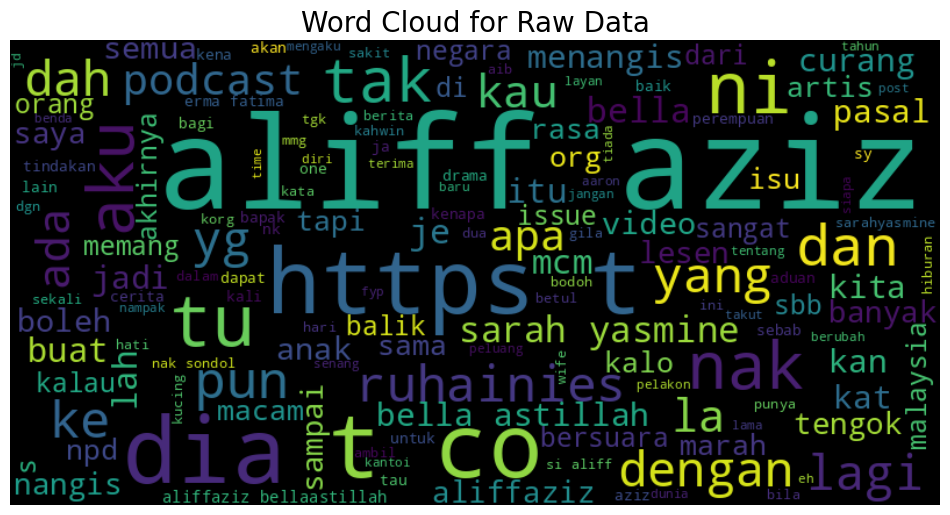

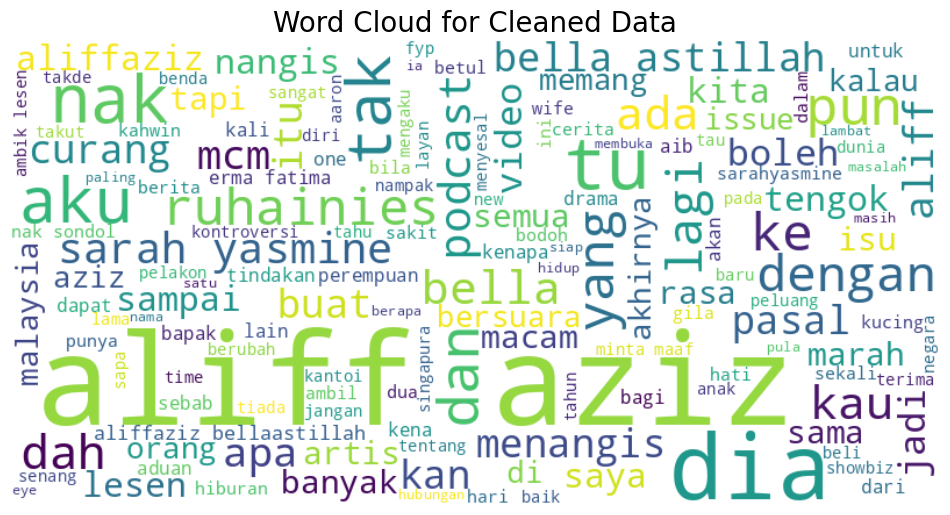

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Plot word cloud for raw data
plt.figure(figsize=(12, 8))
wordcloud_raw = WordCloud(width=800, height=400, background_color='black', max_words=150, colormap='viridis').generate(text_lower_str)
plt.imshow(wordcloud_raw, interpolation="bilinear")
plt.title('Word Cloud for Raw Data', fontsize=20)
plt.axis('off')
plt.show()

# Plot word cloud for clean data
plt.figure(figsize=(12, 8))
wordcloud_clean = WordCloud(width=800, height=400, background_color='white', max_words=150, colormap='viridis').generate(clean_text)
plt.imshow(wordcloud_clean, interpolation="bilinear")
plt.title('Word Cloud for Cleaned Data', fontsize=20)
plt.axis('off')
plt.show()

Print cleaned data.

In [ ]:
# Print cleaned data separately
print("Cleaned Data:")
print(raw_data["clean_text"].head(5))

Cleaned Data:
0           kenapa kawan aku ada muka macam aliff aziz
1    geram ea tengok aliff aziz bila bukak mulut 🤣 ...
2    merepek podcast aliff aziz tuhbaik kau jadi p ...
3                      nazjiya bagi peluang aliff aziz
4    ingatkan dalam hidup paling lambat ambil lesen...
Name: clean_text, dtype: object
